In [1]:
#creatings imports
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import math  

In [2]:
#initializing parameters for the network
learning_rate = 0.8
epochs = 1000
network_dimensions = np.array([100, 100])
#creating input data (RBG variations eg. [255, 0, 0] == red)

input_color = np.zeros([24,3])

#fill up first row with a value of pure yellow:
input_color[0] = [255,255,0]

for rgb in range(1,4):
  #fill up rows 2-13 values with pure values of Red, Green and Blue
  for i in range (1,5):
    rgb_val = 255/i #used to normalize the rgb values as mentioned in the assignment
    if rgb == 1: #red
      input_color[i,0] = rgb_val
    elif rgb == 2:
      input_color[i+4,1] = rgb_val
    elif rgb == 3:
      input_color[i+8,2] = rgb_val

#fill up rows 13 to 15 with teal and pink

input_color[12] = [0,128,128] #teal
input_color[13] = [255,20,147] #hot pink

#Impure shades of blue
input_color[14] = [240,248,255] #alice blue
input_color[15] = [176,224,230] #powder blue
input_color[16] = [70,130,180] #steel blue

#Impure shades of red
input_color[17] = [178,34,34] #firebrick
input_color[18] = [220,20,60] #crimson
input_color[19] = [255,69,0] #orange red

#Impure shades of green
input_color[20] = [124,252,0] #lawn green
input_color[21] = [34,139,34] #forest green
input_color[22] = [0,255,127] #spring green
input_color[23] = [85,107,47] #dark olive freen

#Normalize each input datapoint to be from 0 to 1
input_color = input_color/255

print(input_color)



[[1.         1.         0.        ]
 [1.         0.         0.        ]
 [0.5        0.         0.        ]
 [0.33333333 0.         0.        ]
 [0.25       0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.5        0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.25       0.        ]
 [0.         0.         1.        ]
 [0.         0.         0.5       ]
 [0.         0.         0.33333333]
 [0.         0.50196078 0.50196078]
 [1.         0.07843137 0.57647059]
 [0.94117647 0.97254902 1.        ]
 [0.69019608 0.87843137 0.90196078]
 [0.2745098  0.50980392 0.70588235]
 [0.69803922 0.13333333 0.13333333]
 [0.8627451  0.07843137 0.23529412]
 [1.         0.27058824 0.        ]
 [0.48627451 0.98823529 0.        ]
 [0.13333333 0.54509804 0.13333333]
 [0.         1.         0.49803922]
 [0.33333333 0.41960784 0.18431373]]


In [3]:
#creating functions used within program


#creating function to calc sigma for given input (to be used in neighborhood formula)
def calc_overal_sigma(sigma, current_epoch, total_num_epochs):
  k = current_epoch
  T = total_num_epochs
  overall_sig = sigma * math.exp(-1*(k/T))
  return overall_sig


#creating learning rate calculator
#
def calc_new_learning_rate(alpha_old, current_epoch, total_num_epochs):
  k = current_epoch
  T = total_num_epochs
  alpha_new = 0
  alpha_new = alpha_old*math.exp(-1*(k/T))
  return alpha_new


# Euclidean distance between two vectors.
#done by returning a formula
def dist(x_in, w_vec):
    return np.linalg.norm((x_in-w_vec)**2)


#function to calcualte all distace values of one input and ouput a vector of all distances and choose lowest out of all
def cal_winner_node(input, weights):
  temp_arr = np.zeros((100,100)) #creating temp array to store dist value calculations
  print()
  for i in range(100):
    for j in range(100):
      dist_value = dist(input, weights[i][j]) #for every node a distance value is calculated
      temp_arr[i][j] = dist_value #store that value into a section of the temp array which will be used to determine the indicie of winning node
  
  #determine minimum distance using numpy.where function on temporary array to get the indicies of the winning node of minimum distance calculation
  min_indicies = np.where(temp_arr == np.amin(temp_arr))

  return min_indicies


In [4]:
# randomly initialized weights (in other words, create the map for the network)
map_size = 100
#weights = np.empty([map_size*map_size,3]) 


#initializing weighted map (som)
#in addition, weights of all sigmas used in report are also assigned in order to print out graphs after training
np.random.seed(100)
weights = np.random.random((100,100,3))
weights_0 = np.random.random((100,100,3))
weights_20 = np.random.random((100,100,3))
weights_40 = np.random.random((100,100,3))
weights_100 = np.random.random((100,100,3))
weights_1000 = np.random.random((100,100,3))
#now to perform training on network

#creating loop that will go overall epochs


#currently hard coding initial sigma


############################################################
##CHANGE SIGMA HERE TO SEE SPREAD DIFFERENCE 

sigma = 70

###############################################################


#starting with for loop to go through epochs needed (hardcoded to 1000 epochs)
#within each needed epoch(0, 20, 40, 100, 1000)
for i in range(epochs + 1):
  
  print('in epoch ' + str(i))
  #need to know feed in the inputs (which can be done in a for loop)
  for j in range(0,23):
    input = input_color[j] #takes first color as input into map

    #need to now feed input into network and obtain the winning node
    winner_node = cal_winner_node(input, weights)
    #print('this is winner node')
    #print(winner_node)
  
    #calculating sigma and learning rate for neighbourhood calculation
    sigma_k = calc_overal_sigma(sigma, i, epochs)
    learning_rate = calc_new_learning_rate(learning_rate,i, epochs)
    

    #creating a double for loop that will go through each weight calculation (which represents the 100x100 som) and will determine the winner node
    for x in range(100):
      for y in range(100):

        winner_index_array = np.array((winner_node[0][0],winner_node[1][0]))
        #creating neibourhood formula calc per node, which includes the radius scaled to the size of the map
        neighbourhood = math.exp(-1* (((dist(np.array((x,y)),winner_index_array)/100)**2)/(2*(sigma_k**2))))
        
        #performing weight update to current node
        weight_value = weights[x][y]
        weight_new = weight_value + (learning_rate * neighbourhood * (input - weight_value)) #formulas used here are given in slide dec set 3

        #put updated weight value into network
        weights[x][y] = weight_new
  
  #list of if statements to check if the current epoch is 20, 40, 100, 1000 and if  it is just save the weight in a temp variable for graphing later
  if i == 20:
    weights_20 = np.copy(weights, order = 'K')
  elif i == 40:
    weights_40 = np.copy(weights, order = 'K')
  elif i == 100:
    weights_100 = np.copy(weights, order = 'K')
  elif i == 1000:
    weights_1000 = np.copy(weights, order = 'K')

###shown below will be the number of epochs our model is currently at. This takes around 1hr 30min per run to get all graphs for all epochs
##once this process is done the output of said graphs will be done by the code seen below







  


Streaming output truncated to the last 5000 lines.








in epoch 793























in epoch 794























in epoch 795























in epoch 796























in epoch 797























in epoch 798























in epoch 799























in epoch 800























in epoch 801























in epoch 802























in epoch 803























in epoch 804























in epoch 805























in epoch 806























in epoch 807























in epoch 808























in epoch 809























in epoch 810























in epoch 811























in epoch 812























in epoch 813























in epoch 814























in epoch 815























in epoch 816























in epoch 817























in epoch 818























in ep

<function matplotlib.pyplot.show>

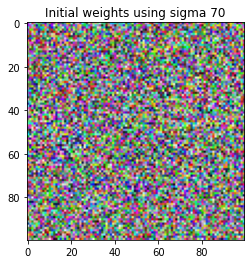

In [5]:
#printing out weights associated with the initialized random weights
plt.title('Initial weights using sigma ' + str(sigma))
plt.imshow(weights_0)
plt.show



<function matplotlib.pyplot.show>

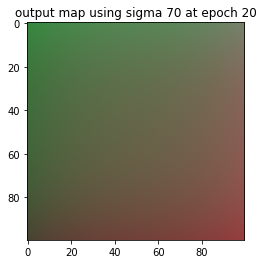

In [6]:
#printing out map for weights associated with 20 epochs for a given sigma
plt.title('output map using sigma ' + str(sigma) + ' at epoch 20')
plt.imshow(weights_20)
plt.show



<function matplotlib.pyplot.show>

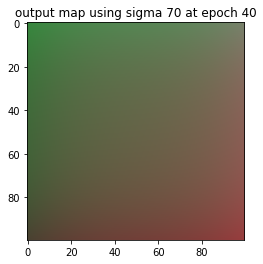

In [7]:
#printing out map for weights associated with 40 epochs for a given sigma
plt.title('output map using sigma ' + str(sigma) + ' at epoch 40')
plt.imshow(weights_40)
plt.show


<function matplotlib.pyplot.show>

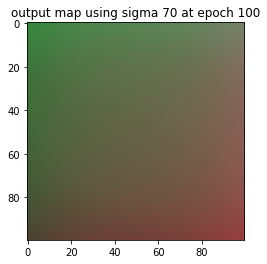

In [8]:
#printing out map for weights associated with 100 epochs for a given sigma
plt.title('output map using sigma ' + str(sigma) + ' at epoch 100')
plt.imshow(weights_100)
plt.show




<function matplotlib.pyplot.show>

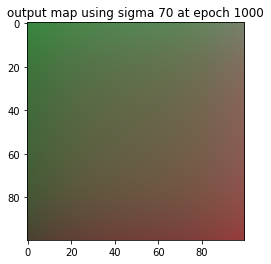

In [9]:
#printing out map for weights associated with 1000 epochs for a given sigma
plt.title('output map using sigma ' + str(sigma) + ' at epoch 1000')
plt.imshow(weights_1000)
plt.show